# Finding Heavy Traffic Indicators on I-94

### About

We're going to analyze a dataset about the westbound traffic on the I-94 Interstate highway. The dataset contains such columns as: 

- *holiday* - categorical data include holidays like Columbus Day, Veterans Day, Thanksgiving Day and so on
- *temp* - average temperature in kelvin 
- *rain_1h* - Amount in mm of rain that occurred in the hour
- *snow_1h* - Amount in mm of snow that occurred in the hour
- *clouds_all* - Percentage of cloud cover
- *weather_main* - Short textual description of the current weather
- *weather_description* - Longer textual description of the current weather
- *date_time* - Hour of the data collected in local CST time
- *traffic_volume* - Hourly I-94 ATR 301 reported westbound traffic volume

The dataset documentation mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west). This means that the results of our analysis will be about the westbound traffic in the proximity of that station. In other words, we should avoid generalizing our results for the entire I-94 highway.

More information about dataset : [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

### Goals

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

## The I-94 Traffic Dataset

In [1]:
import pandas as pd

Read in the `Metro_Interstate_Traffic_Volume.csv` file using Pandas.

In [2]:
metro = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

Examine the first and the last five rows.

In [3]:
print(metro.head(5))

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  


In [4]:
print(metro.tail(5))

      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0          90  Thunderstorm   
48202    None  282.09      0.0      0.0          90        Clouds   
48203    None  282.12      0.0      0.0          90        Clouds   

          weather_description            date_time  traffic_volume  
48199           broken clouds  2018-09-30 19:00:00            3543  
48200         overcast clouds  2018-09-30 20:00:00            2781  
48201  proximity thunderstorm  2018-09-30 21:00:00            2159  
48202         overcast clouds  2018-09-30 22:00:00            1450  
48203         overcast clouds  2018-09-30 23:00:00             954  


Use `DataFrame.info()` to find more information about the dataset.

In [5]:
metro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


## Analyzing Traffic Volume

1. Add the `%matplotlib inline` magic.

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

2. Plot a histogram to examine the distribution of the `traffic_volume` column. Use a Pandas method.

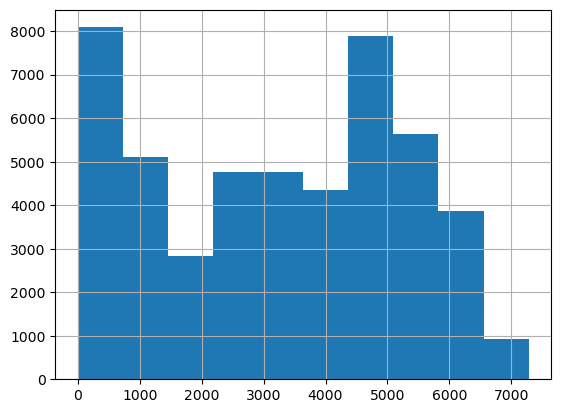

In [7]:
metro['traffic_volume'].hist()
plt.show()

3. Use `Series.describe()` to look up a few statistics about the `traffic_volume` column.

In [8]:
metro['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

The range of data in the `traffic_volume` column ranges from 0 to 7280. The average is 3260. Most observations fall into categories: (0 to 1500) and (4000 to 6000).

About 25% of the time, there were 1,193 cars or fewer passing the station each hour. About 75% of the time, the traffic volume was 4,933 cars or fewer. The remaining 25% of the time, the traffic volume exceeded 4,933 cars.

## Traffic Volume: Day vs. Night

1. Transform the `date_time` column to `datetime` by using the function `pd.to_datetime()`.

In [9]:
metro['date_time'] = pd.to_datetime(metro['date_time'])

In [10]:
print(metro.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB
None


Use the `Series.dt.hour` property to get the hour of every instance of the `date_time` column and do the following:

- Isolate the daytime data
- Isolate the nighttime data

We'll start by dividing the dataset into two parts:

- Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)

- Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

In [11]:
metro['hour'] = metro['date_time'].dt.hour

In [12]:
print(metro.head(7))

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   
5    None  291.72      0.0      0.0           1        Clear   
6    None  293.17      0.0      0.0           1        Clear   

  weather_description           date_time  traffic_volume  hour  
0    scattered clouds 2012-10-02 09:00:00            5545     9  
1       broken clouds 2012-10-02 10:00:00            4516    10  
2     overcast clouds 2012-10-02 11:00:00            4767    11  
3     overcast clouds 2012-10-02 12:00:00            5026    12  
4       broken clouds 2012-10-02 13:00:00            4918    13  
5        sky is clear 2012-10-02 14:00:00            5181    14  
6        sky is clear 201

In [13]:
def day_night(value):
    if 7 <= value < 19:
        return 1            # day
    else:
        return 0            # night

In [14]:
metro['day_night'] = metro['hour'].map(day_night)

In [15]:
print(metro.head(7))

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   
5    None  291.72      0.0      0.0           1        Clear   
6    None  293.17      0.0      0.0           1        Clear   

  weather_description           date_time  traffic_volume  hour  day_night  
0    scattered clouds 2012-10-02 09:00:00            5545     9          1  
1       broken clouds 2012-10-02 10:00:00            4516    10          1  
2     overcast clouds 2012-10-02 11:00:00            4767    11          1  
3     overcast clouds 2012-10-02 12:00:00            5026    12          1  
4       broken clouds 2012-10-02 13:00:00            4918    13          1  
5        sky is clear 201

In [16]:
metro['day_night'].value_counts()

0    24327
1    23877
Name: day_night, dtype: int64

## Traffic Volume: Day vs. Night (II)

1. Plot the histograms of `traffic_volume` for both day and night. Organize the two histograms side-by-side on a grid chart.

2. For both histograms, do the following:
    - Add a title.
    - Add x- and y-labels.
    - Bring the x- and the y-axis to the same ranges (this will help you compare the histograms correctly).

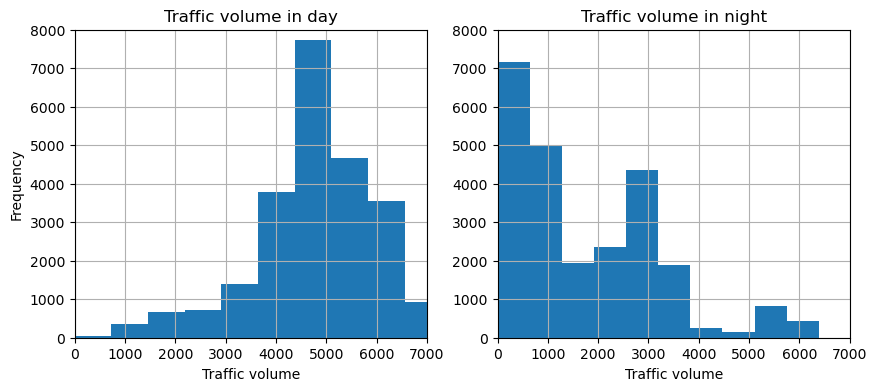

In [17]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
metro.loc[metro['day_night']==1,'traffic_volume'].hist()
plt.title('Traffic volume in day')
plt.xlabel('Traffic volume')
plt.ylabel('Frequency')
plt.xlim([0,7000])
plt.ylim([0,8000])

plt.subplot(1, 2, 2)
metro.loc[metro['day_night']==0,'traffic_volume'].hist()
plt.title('Traffic volume in night')
plt.xlabel('Traffic volume')
plt.xlim([0,7000])
plt.ylim([0,8000])

plt.show()

3. Use `Series.describe()` to look up a few statistics for `traffic_volume` for both day and night.

In [18]:
metro.loc[metro['day_night']==1,'traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [19]:
metro.loc[metro['day_night']==0,'traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

4. Analyze the results:
- What shape do the histograms have and what does that indicate?

- If the traffic is light at night, and our goal is to find indicators of heavy traffic, should we still be using the nighttime data?

**The traffic data for the day exhibits a left-skewed distribution, although it closely resembles a normal distribution. The majority of observations fall within the range of 4000 to 6000, with this range being determined by the 25th and 75th percentiles.**

**The traffic at night is generally light. The traffic data for the day exhibits a right-skewed distribution. The majority of observations fall within the range of 500 to 3000, with this range being determined by the 25th and 75th percentiles.**

**Our goal is to find indicators of heavy traffic, so we decided to only focus on the daytime data moving forward.**

In [20]:
metro = metro.loc[metro['day_night']==1]

In [21]:
print(metro.head(5))

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description           date_time  traffic_volume  hour  day_night  
0    scattered clouds 2012-10-02 09:00:00            5545     9          1  
1       broken clouds 2012-10-02 10:00:00            4516    10          1  
2     overcast clouds 2012-10-02 11:00:00            4767    11          1  
3     overcast clouds 2012-10-02 12:00:00            5026    12          1  
4       broken clouds 2012-10-02 13:00:00            4918    13          1  


## Time Indicators

In [22]:
metro['month'] = metro['date_time'].dt.month
by_month = metro.groupby('month').mean(numeric_only=True)
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

1. Generate a line plot to visualize how the traffic volume changed each month on average.

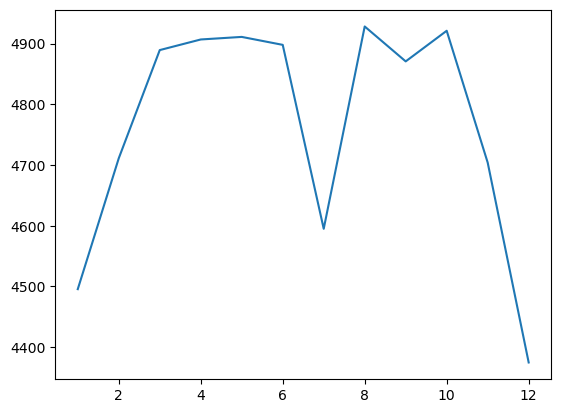

In [23]:
plt.plot(by_month['traffic_volume'])
plt.show()

The lowest traffic volumes occur in the months of January, July, November, and December. For the remaining months, the levels are relatively consistent, hovering around 4900.

## Time Indicators (II)

In [24]:
metro['dayofweek'] = metro['date_time'].dt.dayofweek
by_dayofweek = metro.groupby('dayofweek').mean(numeric_only=True)
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

1. Generate a line plot to visualize how the traffic volume changed each day of the week on average.

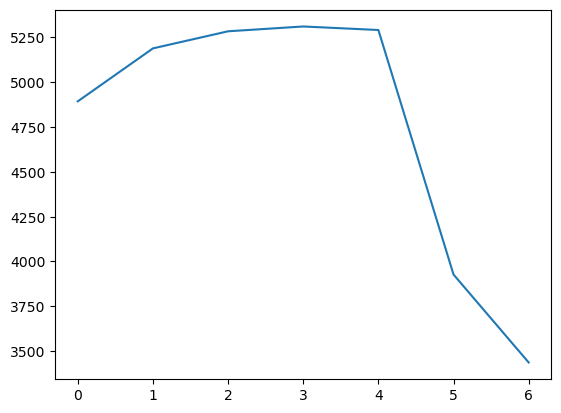

In [25]:
plt.plot(by_dayofweek['traffic_volume'])
plt.show()

We can observe that the lowest average traffic intensity occurs during the weekends.

## Time Indicators (III)

1. Plot two line plots on a grid chart to visualize how the traffic volume changes by time of the day.
    - One plot shows how traffic volume changes during business days and the other shows how it changes during weekends.
    - Add a title to each graph.
    - Bring both graphs to the same x- and y-axis range.

In [26]:
bussiness_days = metro.copy()[metro['dayofweek'] <= 4] # 4 == Friday
weekend = metro.copy()[metro['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean(numeric_only=True)
by_hour_weekend = weekend.groupby('hour').mean(numeric_only=True)

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


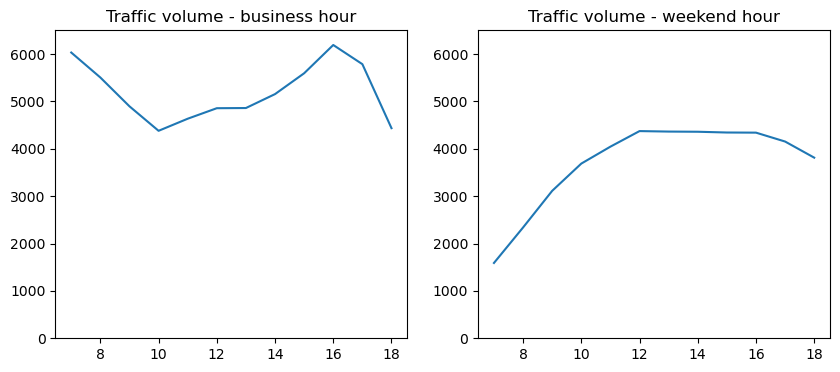

In [27]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.plot(by_hour_business['traffic_volume'])
plt.title('Traffic volume - business hour')
plt.ylim([0,6500])

plt.subplot(1, 2, 2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.title('Traffic volume - weekend hour')
plt.ylim([0,6500])

plt.show()

On business days, the rush hours are around 7 and 16.

On the weekend, the biggest traffic jams occur from 10 a.m. to 6 p.m. and are stable.

## Weather Indicators

1. Find the correlation values between `traffic_volume` and the numerical weather columns.

In [28]:
metro.corr(numeric_only = True)['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
hour              0.172704
day_night              NaN
month            -0.022337
dayofweek        -0.416453
Name: traffic_volume, dtype: float64

As you can see, there is no weather numerical column that exhibits a strong correlation with the `traffic_volume` column.

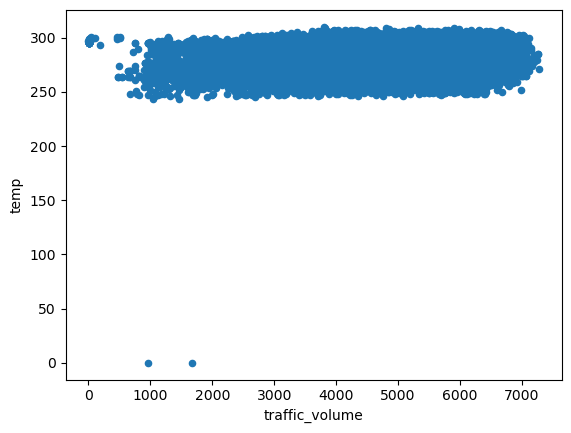

In [29]:
metro.plot.scatter(x='traffic_volume',
                      y='temp')
plt.show()

## Weather Types

In [30]:
by_weather_main = metro.groupby('weather_main').mean(numeric_only = True)
by_weather_description = metro.groupby('weather_description').mean(numeric_only = True)

In [31]:
print(by_weather_main.head(5))

                    temp   rain_1h   snow_1h  clouds_all  traffic_volume  \
weather_main                                                               
Clear         283.812078  0.000000  0.000000    1.670265     4778.416260   
Clouds        282.929274  0.000000  0.000000   62.667548     4865.415996   
Drizzle       284.456433  0.170804  0.000000   84.704417     4837.212911   
Fog           277.579641  0.163840  0.001409   65.477901     4372.491713   
Haze          275.319353  0.040036  0.000000   64.000000     4609.893285   

                   hour  day_night     month  dayofweek  
weather_main                                             
Clear         12.404248        1.0  6.490599   3.138928  
Clouds        12.911974        1.0  6.393243   3.005631  
Drizzle       12.308041        1.0  7.105323   2.934315  
Fog           10.325967        1.0  6.646409   2.798343  
Haze          12.467626        1.0  5.832134   2.754197  


In [32]:
print(by_weather_description.head(5))

                           temp   rain_1h  snow_1h  clouds_all  \
weather_description                                              
SQUALLS              296.730000  1.020000      0.0   75.000000   
Sky is Clear         293.232549  0.000000      0.0    0.000000   
broken clouds        282.372927  0.000000      0.0   72.635875   
drizzle              283.573777  0.145072      0.0   88.589928   
few clouds           284.272965  0.000000      0.0   19.391951   

                     traffic_volume       hour  day_night     month  dayofweek  
weather_description                                                             
SQUALLS                 4211.000000  14.000000        1.0  7.000000   2.000000  
Sky is Clear            4919.009390  12.453052        1.0  7.557512   2.895540  
broken clouds           4824.130326  12.811314        1.0  6.675260   2.998210  
drizzle                 4737.330935  11.697842        1.0  7.244604   3.028777  
few clouds              4839.818023  12.633421     

1. Plot a horizontal bar plot for the `traffic_volume` column of `by_weather_main`.

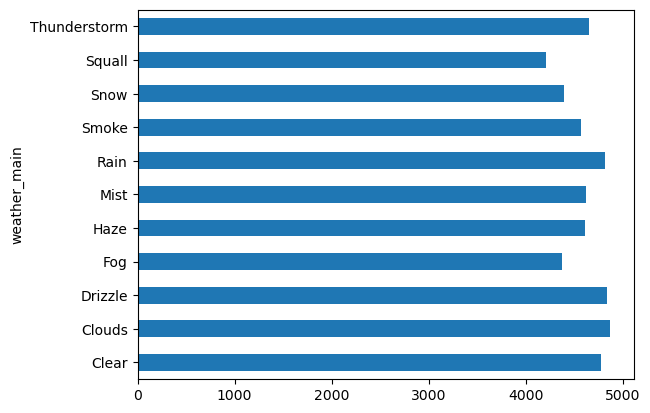

In [34]:
by_weather_main['traffic_volume'].plot.barh()
plt.show()

2. Analyze the bar plot. Is there any traffic volume exceeding 5,000 cars? Can you find any weather type as a heavy traffic indicator?

There is no type of weather that exceeds a traffic volume of 5,000 cars. We can assume that no type of weather includes a large traffic volume.

3. Plot a horizontal bar plot for the `traffic_volume` column of `by_weather_description`. This column has many unique values, so you'll need to enlarge the figure size to make it readable. You can use `plt.figure(figsize=(width,height))` or `Series.plot.barh(figsize=(width,height))`.

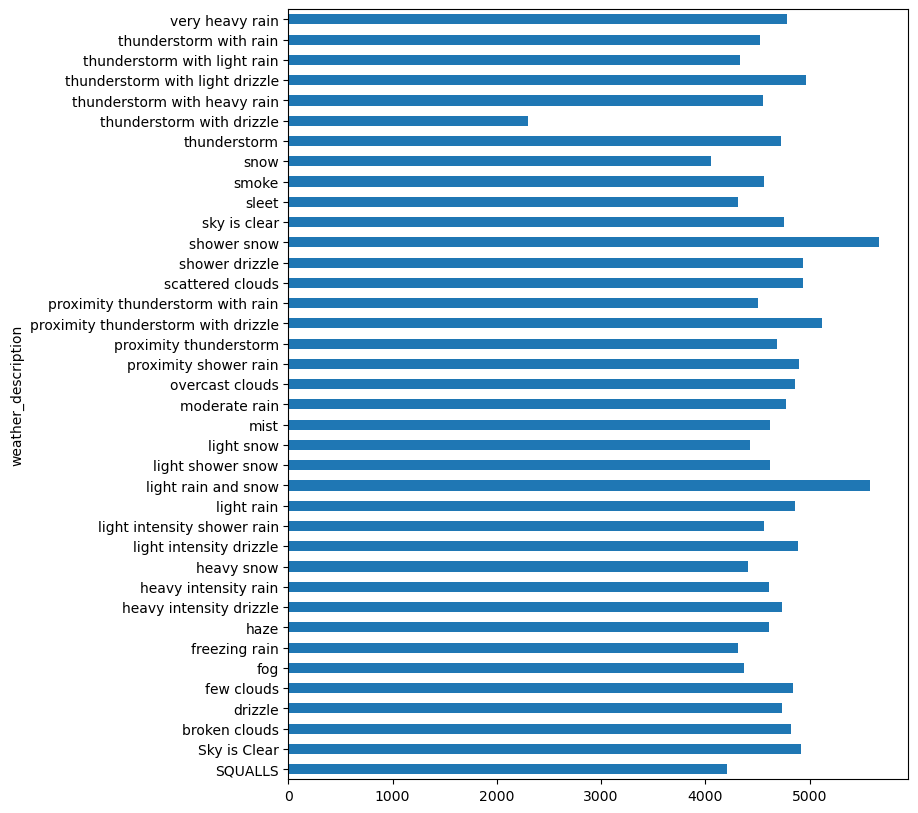

In [39]:
plt.figure(figsize=(8,10))
by_weather_description['traffic_volume'].plot.barh()
plt.show()

4. Analyze the bar plot. Is there any traffic volume exceeding 5,000 cars? Can you find any weather type as a heavy traffic indicator?

The weather conditions `Shower snow` and `light rain and snow` are associated with traffic volumes exceeding 5,000 cars.